In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#library to handle date value
from datetime import datetime

#statistical libraries 
from scipy import stats
from scipy.stats import skew, boxcox_normmax, norm
from scipy.special import boxcox1p

#
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

import warnings
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')


# **first look to the data**

In [2]:
#read Data
train = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
test = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')

In [3]:
print(f'train shape: {train.shape}')
print(f'test shape: {test.shape}')

train shape: (1460, 81)
test shape: (1459, 80)


In [4]:
len(train)

1460

In [5]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [7]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [8]:
#dropping unnecessary id column
train.drop('Id', axis =1, inplace = True)
test.drop('Id', axis = 1, inplace = True)

In [9]:
categorical_var = [col for col in train.columns if train[col].dtype == 'object']
numerical_var = [col for col in test.columns if col not in categorical_var]

In [10]:
train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [11]:
test.describe()

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1459.000000  1232.000000   1459.000000  1459.000000  1459.000000   
mean     57.378341    68.580357   9819.161069     6.078821     5.553804   
std      42.746880    22.376841   4955.517327     1.436812     1.113740   
min      20.000000    21.000000   1470.000000     1.000000     1.000000   
25%      20.000000    58.000000   7391.000000     5.000000     5.000000   
50%      50.000000    67.000000   9399.000000     6.000000     5.000000   
75%      70.000000    80.000000  11517.500000     7.000000     6.000000   
max     190.000000   200.000000  56600.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1459.000000   1459.000000  1444.000000  1458.000000  1458.000000   
mean   1971.357779   1983.662783   100.709141   439.203704    52.619342   
std      30.390071     21.130467   177.625900   455.268042   176.753926   
min    1879.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1953.000000   1963.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1992.000000     0.000000   350.500000     0.000000   
75%    2001.000000   2004.000000   164.000000   753.500000     0.000000   
max    2010.000000   2010.000000  1290.000000  4010.000000  1526.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1458.000000  1458.000000  1459.000000  1459.000000   1459.000000   
mean    554.294925  1046.117970  1156.534613   325.967786      3.543523   
std     437.260486   442.898624   398.165820   420.610226     44.043251   
min       0.000000     0.000000   407.000000     0.000000      0.000000   
25%     219.250000   784.000000   873.500000     0.000000      0.000000   
50%     460.000000   988.000000  1079.000000     0.000000      0.000000   
75%     797.750000  1305.000000  1382.500000   676.000000      0.000000   
max    2140.000000  5095.000000  5095.000000  1862.000000   1064.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1459.000000   1457.000000   1457.000000  1459.000000  1459.000000   
mean   1486.045922      0.434454      0.065202     1.570939     0.377656   
std     485.566099      0.530648      0.252468     0.555190     0.503017   
min     407.000000      0.000000      0.000000     0.000000     0.000000   
25%    1117.500000      0.000000      0.000000     1.000000     0.000000   
50%    1432.000000      0.000000      0.000000     2.000000     0.000000   
75%    1721.000000      1.000000      0.000000     2.000000     1.000000   
max    5095.000000      3.000000      2.000000     4.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
count   1459.000000   1459.000000   1459.000000  1459.00000  1381.000000   
mean       2.854010      1.042495      6.385195     0.58122  1977.721217   
std        0.829788      0.208472      1.508895     0.64742    26.431175   
min        0.000000      0.000000      3.000000     0.00000  1895.000000   
25%        2.000000      1.000000      5.000000     0.00000  1959.000000   
50%        3.000000      1.000000      6.000000     0.00000  1979.000000   
75%        3.000000      1.000000      7.000000     1.00000  2002.000000   
max        6.000000      2.000000     15.000000     4.00000  2207.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1458.000000  1458.000000  1459.000000  1459.000000    1459.000000   
mean      1.766118   472.768861    93.174777    48.313914      24.243317   
std       0.775945   217.048611   127.744882    68.883364      67.227765   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   318.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    28.000000       0.000000   
75%       2.000000   576.000000   168.000000    72.000000       0.000000   
ma

In [12]:
#separate and backing target variables and dropping them from the train data
y = train['SalePrice'].reset_index(drop = True)
train_features = train.drop(['SalePrice'], axis = 1)
test_features = test

# **EDA** 

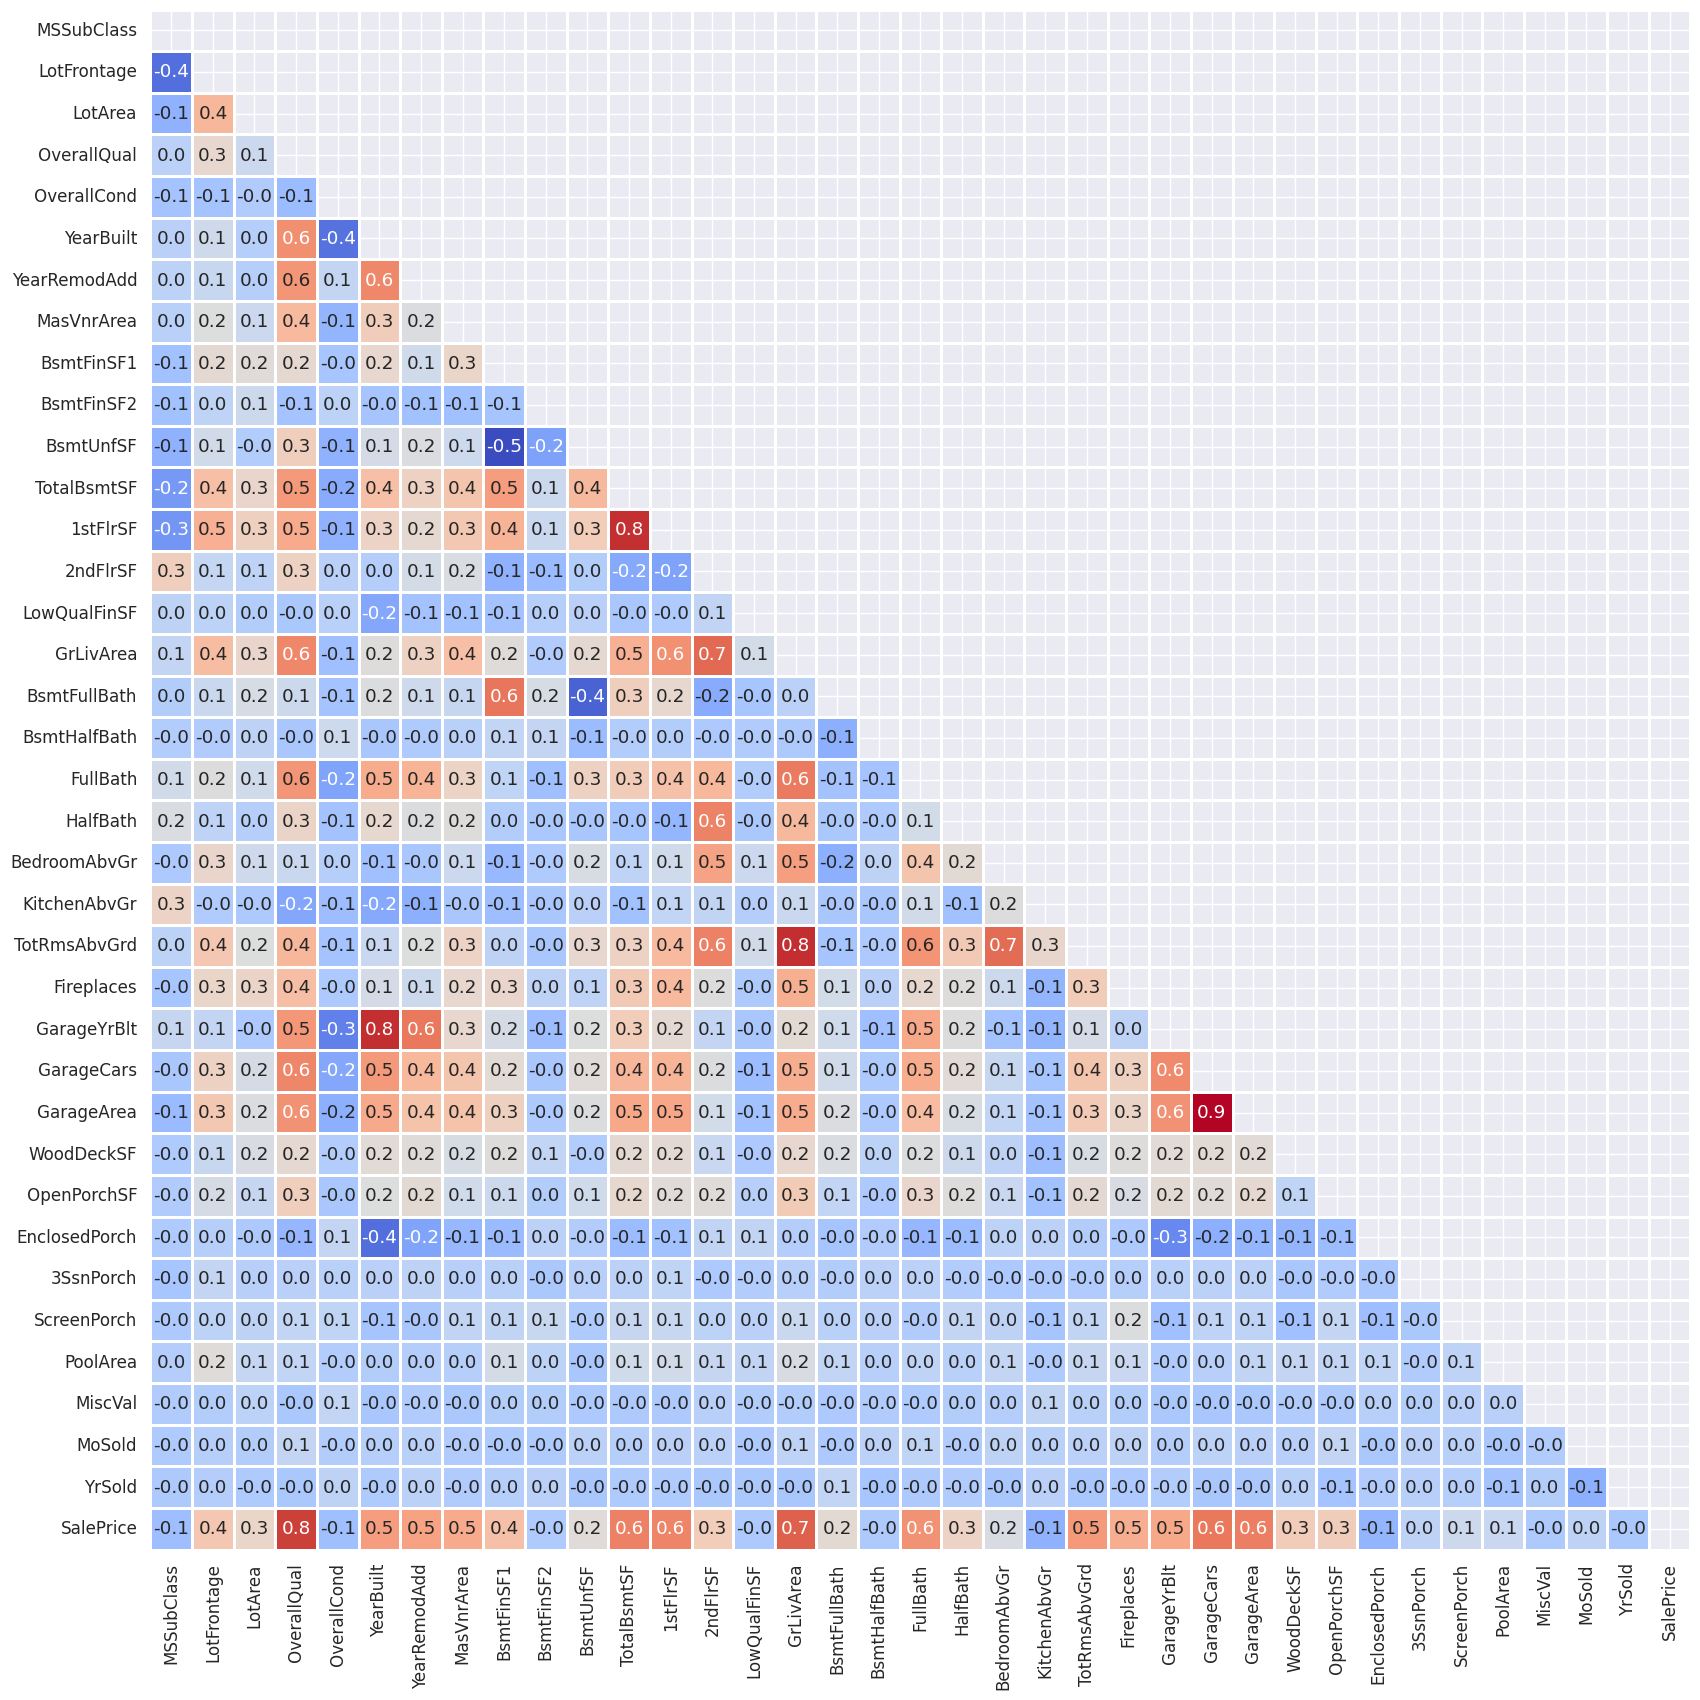

In [13]:
#display numerical correlations between features on heatmap
sns.set(font_scale = 1.1)
correlation_train = train[numerical_var +['SalePrice']].corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize = (20,20))
sns.heatmap(correlation_train,
           annot = True,
           fmt = '.1f',
           cmap = 'coolwarm',
            mask = mask,
           square = True,
           linewidths = 1,
           cbar = False)
plt.show()

In [14]:
#Merging features (so we don't have to do these operation twice)
features = pd.concat([train_features, test_features]).reset_index(drop = True)
print(features.shape)

(2919, 79)


# **Missing Data**

In [15]:
#missing data

def missing_percentage(df):
    missing_data= df.isnull().sum().sort_values(ascending = False)
    total_missing_data = missing_data[missing_data != 0]
    percent = total_missing_data/ len(df)*100
    return pd.concat([total_missing_data, percent], axis = 1, keys = ['Total','Percent'])
    

PoolQC  MiscFeature        Alley        Fence   MasVnrType  \
Total    2909.000000  2814.000000  2721.000000  2348.000000  1766.000000   
Percent    99.657417    96.402878    93.216855    80.438506    60.500171   

         FireplaceQu  LotFrontage  GarageYrBlt  GarageFinish  GarageQual  \
Total    1420.000000   486.000000   159.000000    159.000000  159.000000   
Percent    48.646797    16.649538     5.447071      5.447071    5.447071   

         GarageCond  GarageType  BsmtExposure   BsmtCond   BsmtQual  \
Total    159.000000  157.000000     82.000000  82.000000  81.000000   
Percent    5.447071    5.378554      2.809181   2.809181   2.774923   

         BsmtFinType2  BsmtFinType1  MasVnrArea  MSZoning  BsmtHalfBath  \
Total       80.000000     79.000000   23.000000  4.000000      2.000000   
Percent      2.740665      2.706406    0.787941  0.137033      0.068517   

         Utilities  BsmtFullBath  Functional  TotalBsmtSF  BsmtFinSF1  \
Total     2.000000      2.000000    2.000000     1.000000    1.000000   
Percent   0.068517      0.068517    0.068517     0.034258    0.034258   

         SaleType  BsmtFinSF2  GarageCars  Exterior2nd  Exterior1st  \
Total    1.000000    1.000000    1.000000     1.000000     1.000000   
Percent  0.034258    0.034258    0.034258     0.034258     0.034258   

         GarageArea  KitchenQual  BsmtUnfSF  Electrical  
Total      1.000000     1.000000   1.000000    1.000000  
Percent    0.034258     0.034258   0.034258    0.034258

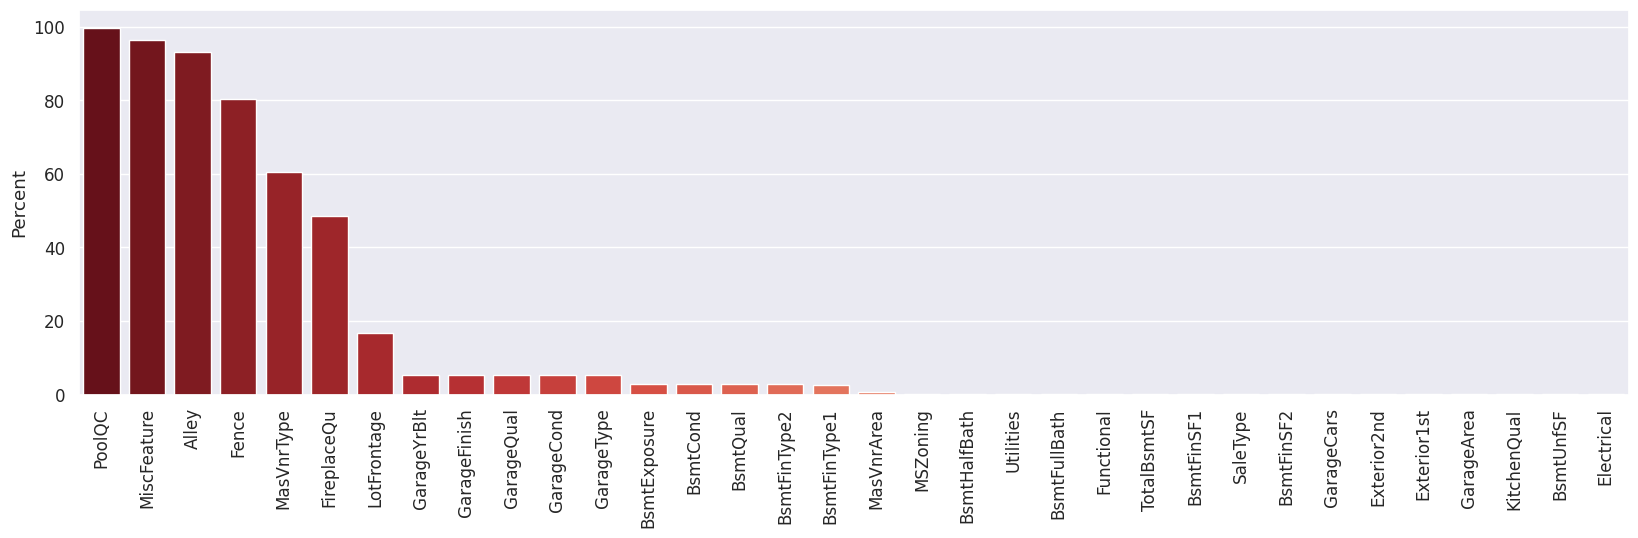

In [16]:
missing = missing_percentage(features)
display(missing.T)

fig,ax = plt.subplots(figsize = (20,5))
sns.barplot(x = missing.index, y ='Percent', data = missing, palette = 'Reds_r')
plt.xticks(rotation = 90)
plt.show()

from the data description, we can see thagt most of these missing data actually not missing, it just means house doesn't have that specific features ex = pool, fence , etc

fix missing values:
1. fill the NaN's in the columns where they mean "None' for categorical data and 0 for numerical data
2. for actual missing data, by checking general trends of these features i will fill them with most frequent value
3. for MSZoning part i will fill them with most common type of the related MSSUbClass type.

In [17]:
#list of NaN including columns where NaN's mean none
none_cols = [
    'Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'
]

#list of NaN including columns where NaN's mean 0
zero_cols = [
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
    'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea'
]

# List of NaN including columns where NaN's actually missing gonna replaced with mode.
freq_cols = [
    'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual',
    'SaleType', 'Utilities'
]

#filling the list of columns above
for col in none_cols:
    features[col].replace(np.nan, 'None', inplace = True)

for col in zero_cols :
    features[col].replace(np.nan, 0 , inplace = True)

for col in freq_cols:
    features[col].replace(np.nan, features[col].mode()[0], inplace = True)

In [18]:
# Filling MSZoning according to MSSubClass
features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(
    lambda x: x.fillna(x.mode()[0]))

In [19]:
# Filling Lotfrontage according to Neighborhood
features['LotFrontage'] = features.groupby(
    ['Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [20]:
# Features which numerical on data but should be treated as category.
features['MSSubClass'] = features['MSSubClass'].astype(str)
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)

# **Feature Engineering**

Relations between categorical data and sale price. i also going to sort them by the median value of that group so we can see the importances in descending order

In [21]:
def srt_box(y, df):
    fig, axes = plt.subplots(14, 3, figsize=(25, 80))
    axes = axes.flatten()

    for i, j in zip(df.select_dtypes(include=['object']).columns, axes):

        sortd = df.groupby([i])[y].median().sort_values(ascending=False)
        sns.boxplot(x=i,
                    y=y,
                    data=df,
                    palette='plasma',
                    order=sortd.index,
                    ax=j)
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=18))

        plt.tight_layout()

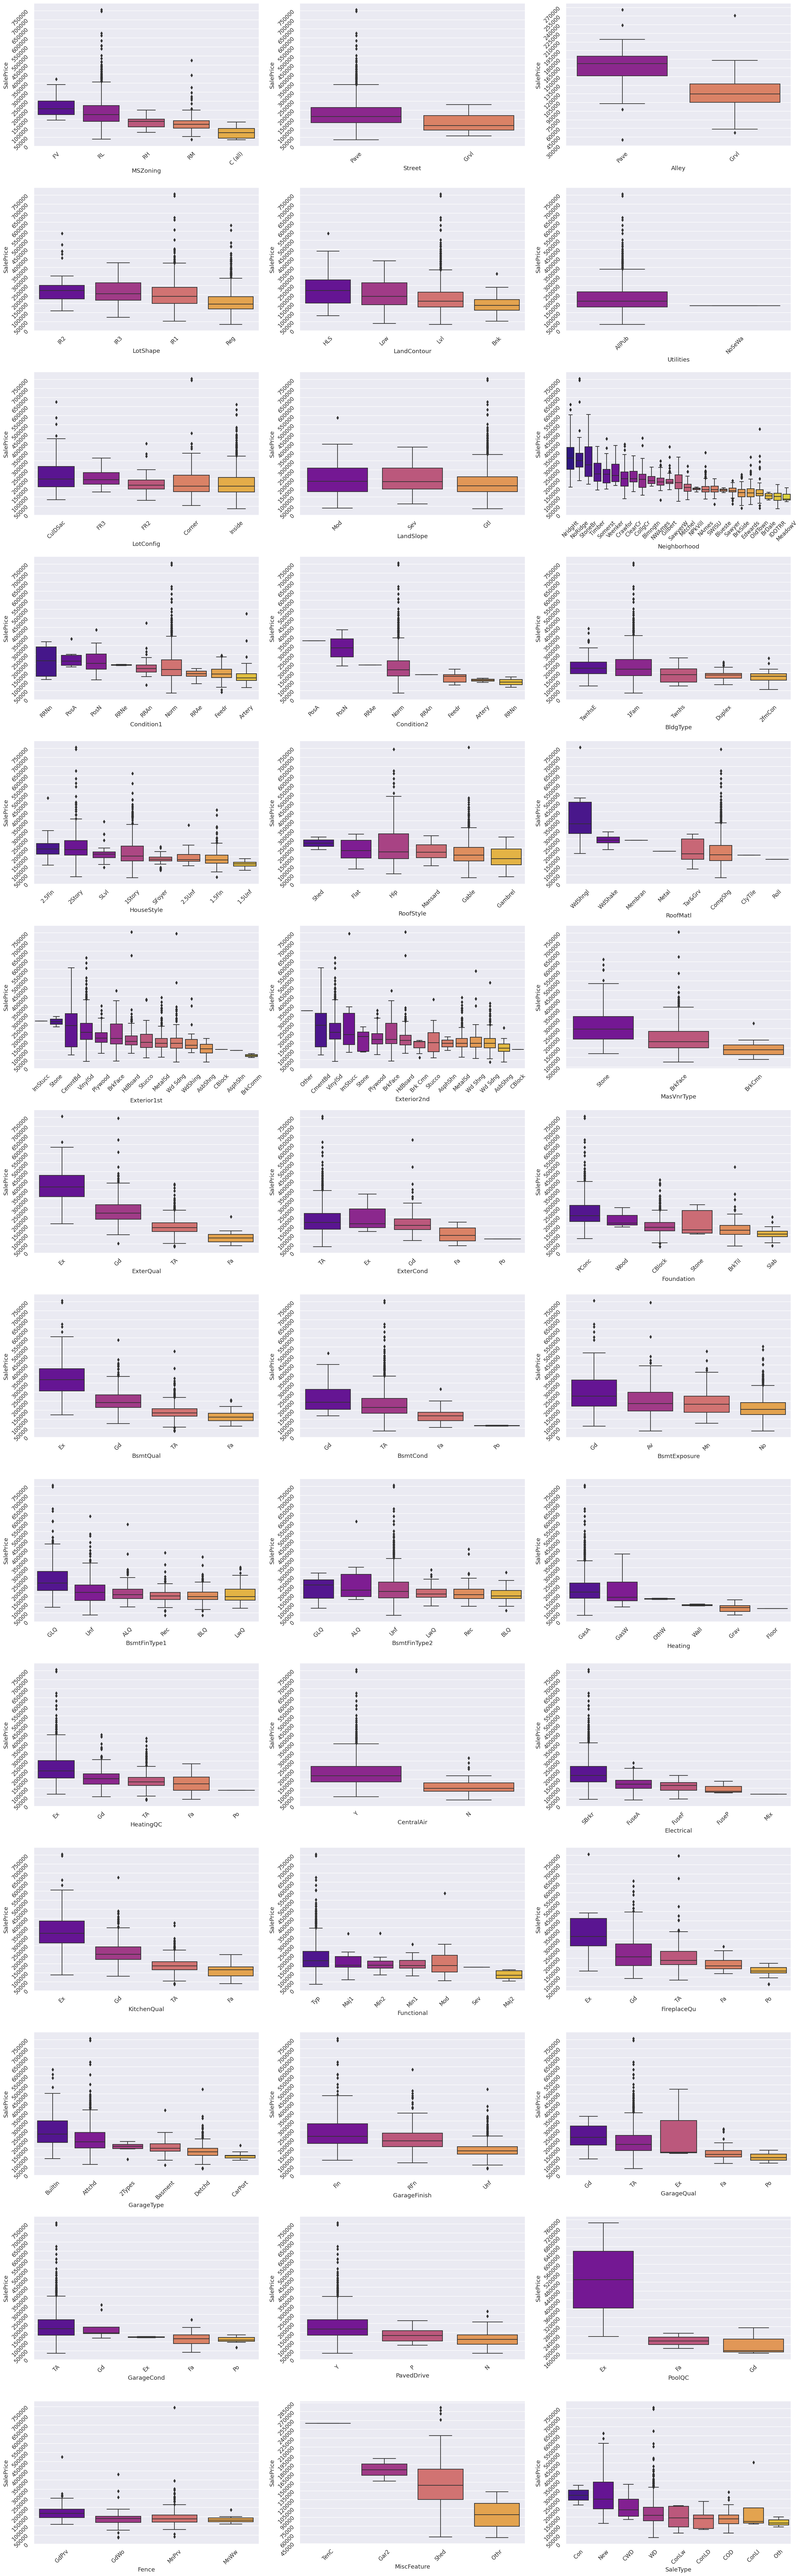

In [22]:
# Displaying sale prices vs. categorical values
srt_box('SalePrice', train)

**Observations:**

**MSZoning;**

Floating village houses (I assume they are some kind of special area that retired community resides, has the highest median value.

Residental low density houses comes second with the some outliers.

Residental high and low seems similar meanwhile commercial is the lowest.

LandContour; Hillside houses seems a little bit higher expensive than the rest meanwhile banked houses are the lowest.

**Neighborhood;**

Northridge Heights, Northridge and Timberland are top 3 expensive places for houses.

Somerset, Veenker, Crawford, Clear Creek, College Creek and Bloomington Heights seems above average.

Sawyer West has wide range for prices related to similar priced regions.

Old Town and Edwards has some outlier prices but they generally below average.

Briardale, Iowa DOT and Rail Road, Meadow Village are the cheapest places for houses it seems...

**Conditions;**

Meanwhile having wide range of values being close to North-South Railroad seems having positive effect on the price.

Being near or adjacent to positive off-site feature (park, greenbelt, etc.) increases the price.

These values are pretty similar but we can get some useful information from them.

**MasVnrType;** Having stone masonry veneer seems better priced than having brick.

**Quality Features;** There are many categorical quality values that affects the pricing on some degree, we're going to quantify them so we can create new features based on them. So we don't dive deep on them in this part.

**CentralAir;** Having central air system has decent positive effect on sale prices.

**GarageType;**

 Built-In (Garage part of house - typically has room above garage) garage typed houses are the most expensive ones.
 
Attached garage types following the built-in ones.

Car ports are the lowest

**Misc;** Sale type has some kind of effect on the prices but we won't get into details here. Btw... It seems having tennis court is really adding price to your house, who would have known :)


In [23]:
# Converting some of the categorical values to numeric ones.

neigh_map = {
    'MeadowV': 1,
    'IDOTRR': 1,
    'BrDale': 1,
    'BrkSide': 2,
    'OldTown': 2,
    'Edwards': 2,
    'Sawyer': 3,
    'Blueste': 3,
    'SWISU': 3,
    'NPkVill': 3,
    'NAmes': 3,
    'Mitchel': 4,
    'SawyerW': 5,
    'NWAmes': 5,
    'Gilbert': 5,
    'Blmngtn': 5,
    'CollgCr': 5,
    'ClearCr': 6,
    'Crawfor': 6,
    'Veenker': 7,
    'Somerst': 7,
    'Timber': 8,
    'StoneBr': 9,
    'NridgHt': 10,
    'NoRidge': 10
}

features['Neighborhood'] = features['Neighborhood'].map(neigh_map).astype(
    'int')
ext_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
features['ExterQual'] = features['ExterQual'].map(ext_map).astype('int')
features['ExterCond'] = features['ExterCond'].map(ext_map).astype('int')

bsm_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
features['BsmtQual'] = features['BsmtQual'].map(bsm_map).astype('int')
features['BsmtCond'] = features['BsmtCond'].map(bsm_map).astype('int')

bsmf_map = {
    'None': 0,
    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
}
features['BsmtFinType1'] = features['BsmtFinType1'].map(bsmf_map).astype('int')
features['BsmtFinType2'] = features['BsmtFinType2'].map(bsmf_map).astype('int')

heat_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
features['HeatingQC'] = features['HeatingQC'].map(heat_map).astype('int')
features['KitchenQual'] = features['KitchenQual'].map(heat_map).astype('int')
features['FireplaceQu'] = features['FireplaceQu'].map(bsm_map).astype('int')
features['GarageCond'] = features['GarageCond'].map(bsm_map).astype('int')
features['GarageQual'] = features['GarageQual'].map(bsm_map).astype('int')

# **Numeric Data**
for numerical data to see how they effect sale price, one of the best way is visualize it with scatter plots. i aslo plotting polynomial regression line to see general trend.


In [24]:
# Plotting numerical features with polynomial order to detect outliers
def srt_reg(y, df):
    fig, axes = plt.subplots(12, 3, figsize=(25, 80))
    axes = axes.flatten()

    for i, j in zip(df.select_dtypes(include=['number']).columns, axes):

        sns.regplot(x=i,
                    y=y,
                    data=df,
                    ax=j,
                    order=3,
                    ci=None,
                    color='#e74c3c',
                    line_kws={'color': 'black'},
                    scatter_kws={'alpha':0.4})
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=10))

        plt.tight_layout()

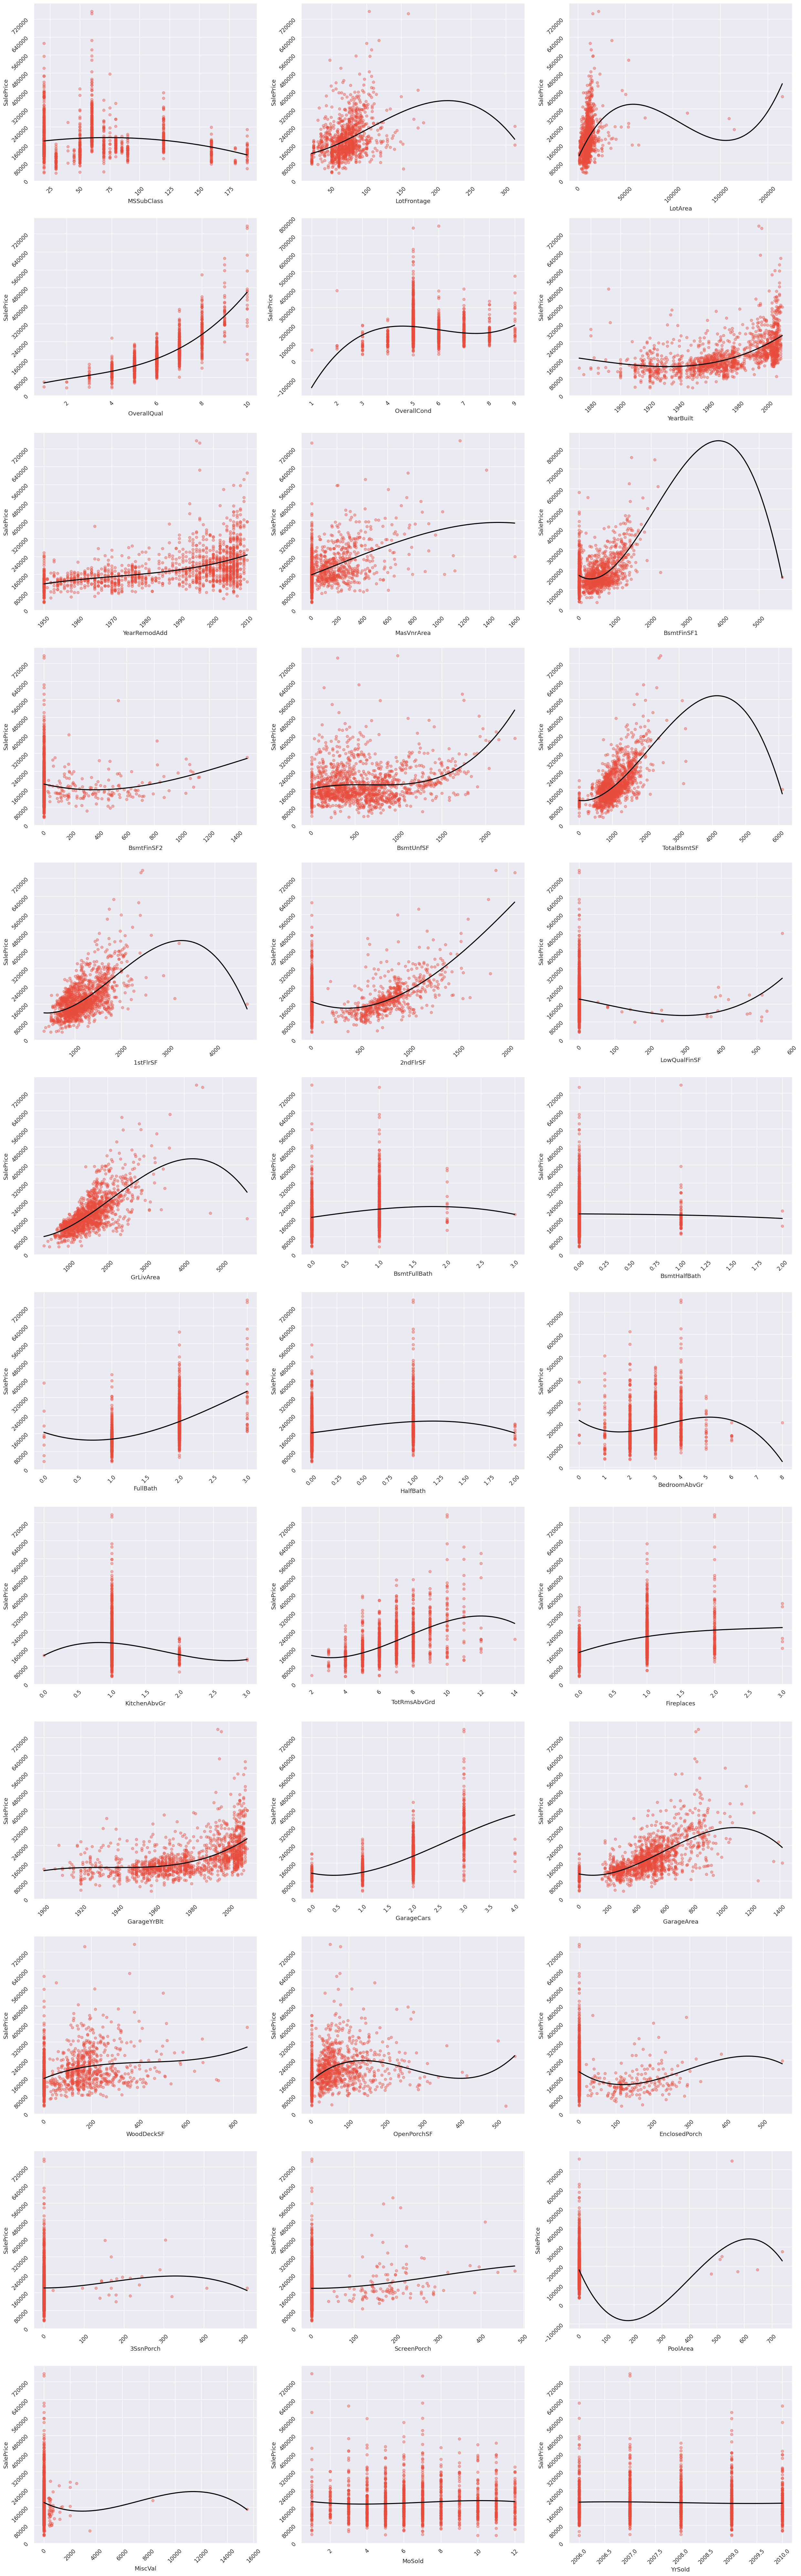

In [25]:
srt_reg('SalePrice', train)


**Observations:**

**OverallQual;**
 It's clearly visible that sale price of the house increases with overall quality. This confirms the correlation in first table we did at the beginning. (Pearson corr was 0.8)

**OverallCondition;** Looks like overall condition is left skewed where most of the houses are around 5/10 condition. But it doesn't effect the price like quality indicator...

**YearBuilt;** Again new buildings are generally expensive than the old ones.

**Basement;** General table shows bigger basements are increasing the price but I see some outliers there...

**GrLivArea;** This feature is pretty linear but we can spot two outliers effecting this trend. There are some huge area houses with pretty cheap prices, there might be some reason behind it but we better drop them.

**SaleDates;** They seem pretty unimportant on sale prices, we can drop them...


# **Outliers**

In [26]:
# Dropping outliers after detecting them by eye
features = features.join(y)
features = features.drop(features[(features['OverallQual'] < 5)
                                  & (features['SalePrice'] > 200000)].index)
features = features.drop(features[(features['GrLivArea'] > 4000)
                                  & (features['SalePrice'] < 200000)].index)
features = features.drop(features[(features['GarageArea'] > 1200)
                                  & (features['SalePrice'] < 200000)].index)
features = features.drop(features[(features['TotalBsmtSF'] > 3000)
                                  & (features['SalePrice'] > 320000)].index)
features = features.drop(features[(features['1stFlrSF'] < 3000)
                                  & (features['SalePrice'] > 600000)].index)
features = features.drop(features[(features['1stFlrSF'] > 3000)
                                  & (features['SalePrice'] < 200000)].index)

y = features['SalePrice']
y.dropna(inplace=True)
features.drop(columns='SalePrice', inplace=True)

# **Creating New Features**

In [27]:
# Creating new features  based on previous observations
features['TotalSF'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
                       features['1stFlrSF'] + features['2ndFlrSF'])
features['TotalBathrooms'] = (features['FullBath'] +
                              (0.5 * features['HalfBath']) +
                              features['BsmtFullBath'] +
                              (0.5 * features['BsmtHalfBath']))

features['TotalPorchSF'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                            features['EnclosedPorch'] +
                            features['ScreenPorch'] + features['WoodDeckSF'])

features['YearBlRm'] = (features['YearBuilt'] + features['YearRemodAdd'])

# Merging quality and conditions
features['TotalExtQual'] = (features['ExterQual'] + features['ExterCond'])
features['TotalBsmQual'] = (features['BsmtQual'] + features['BsmtCond'] +
                            features['BsmtFinType1'] +
                            features['BsmtFinType2'])
features['TotalGrgQual'] = (features['GarageQual'] + features['GarageCond'])
features['TotalQual'] = features['OverallQual'] + features[
    'TotalExtQual'] + features['TotalBsmQual'] + features[
        'TotalGrgQual'] + features['KitchenQual'] + features['HeatingQC']

# Creating new features by using new quality indicators
features['QualGr'] = features['TotalQual'] * features['GrLivArea']
features['QualBsm'] = features['TotalBsmQual'] * (features['BsmtFinSF1'] +
                                                  features['BsmtFinSF2'])
features['QualPorch'] = features['TotalExtQual'] * features['TotalPorchSF']
features['QualExt'] = features['TotalExtQual'] * features['MasVnrArea']
features['QualGrg'] = features['TotalGrgQual'] * features['GarageArea']
features['QlLivArea'] = (features['GrLivArea'] -
                         features['LowQualFinSF']) * (features['TotalQual'])
features['QualSFNg'] = features['QualGr'] * features['Neighborhood']

In [28]:
# Observing the effects of newly creater features on sale price
def srt_reg(feature):
    merged = features.join(y)
    fig, axes = plt.subplots(5, 3, figsize=(25, 40))
    axes = axes.flatten()

    new_features = [
        'TotalSF', 'TotalBathrooms', 'TotalPorchSF', 'YearBlRm',
        'TotalExtQual', 'TotalBsmQual', 'TotalGrgQual', 'TotalQual', 'QualGr',
        'QualBsm', 'QualPorch', 'QualExt', 'QualGrg', 'QlLivArea', 'QualSFNg'
    ]

    for i, j in zip(new_features, axes):

        sns.regplot(x=i,
                    y=feature,
                    data=merged,
                    ax=j,
                    order=3,
                    ci=None,
                    color='#e74c3c',
                    line_kws={'color': 'black'},
                    scatter_kws={'alpha':0.4})
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=10))

        plt.tight_layout()

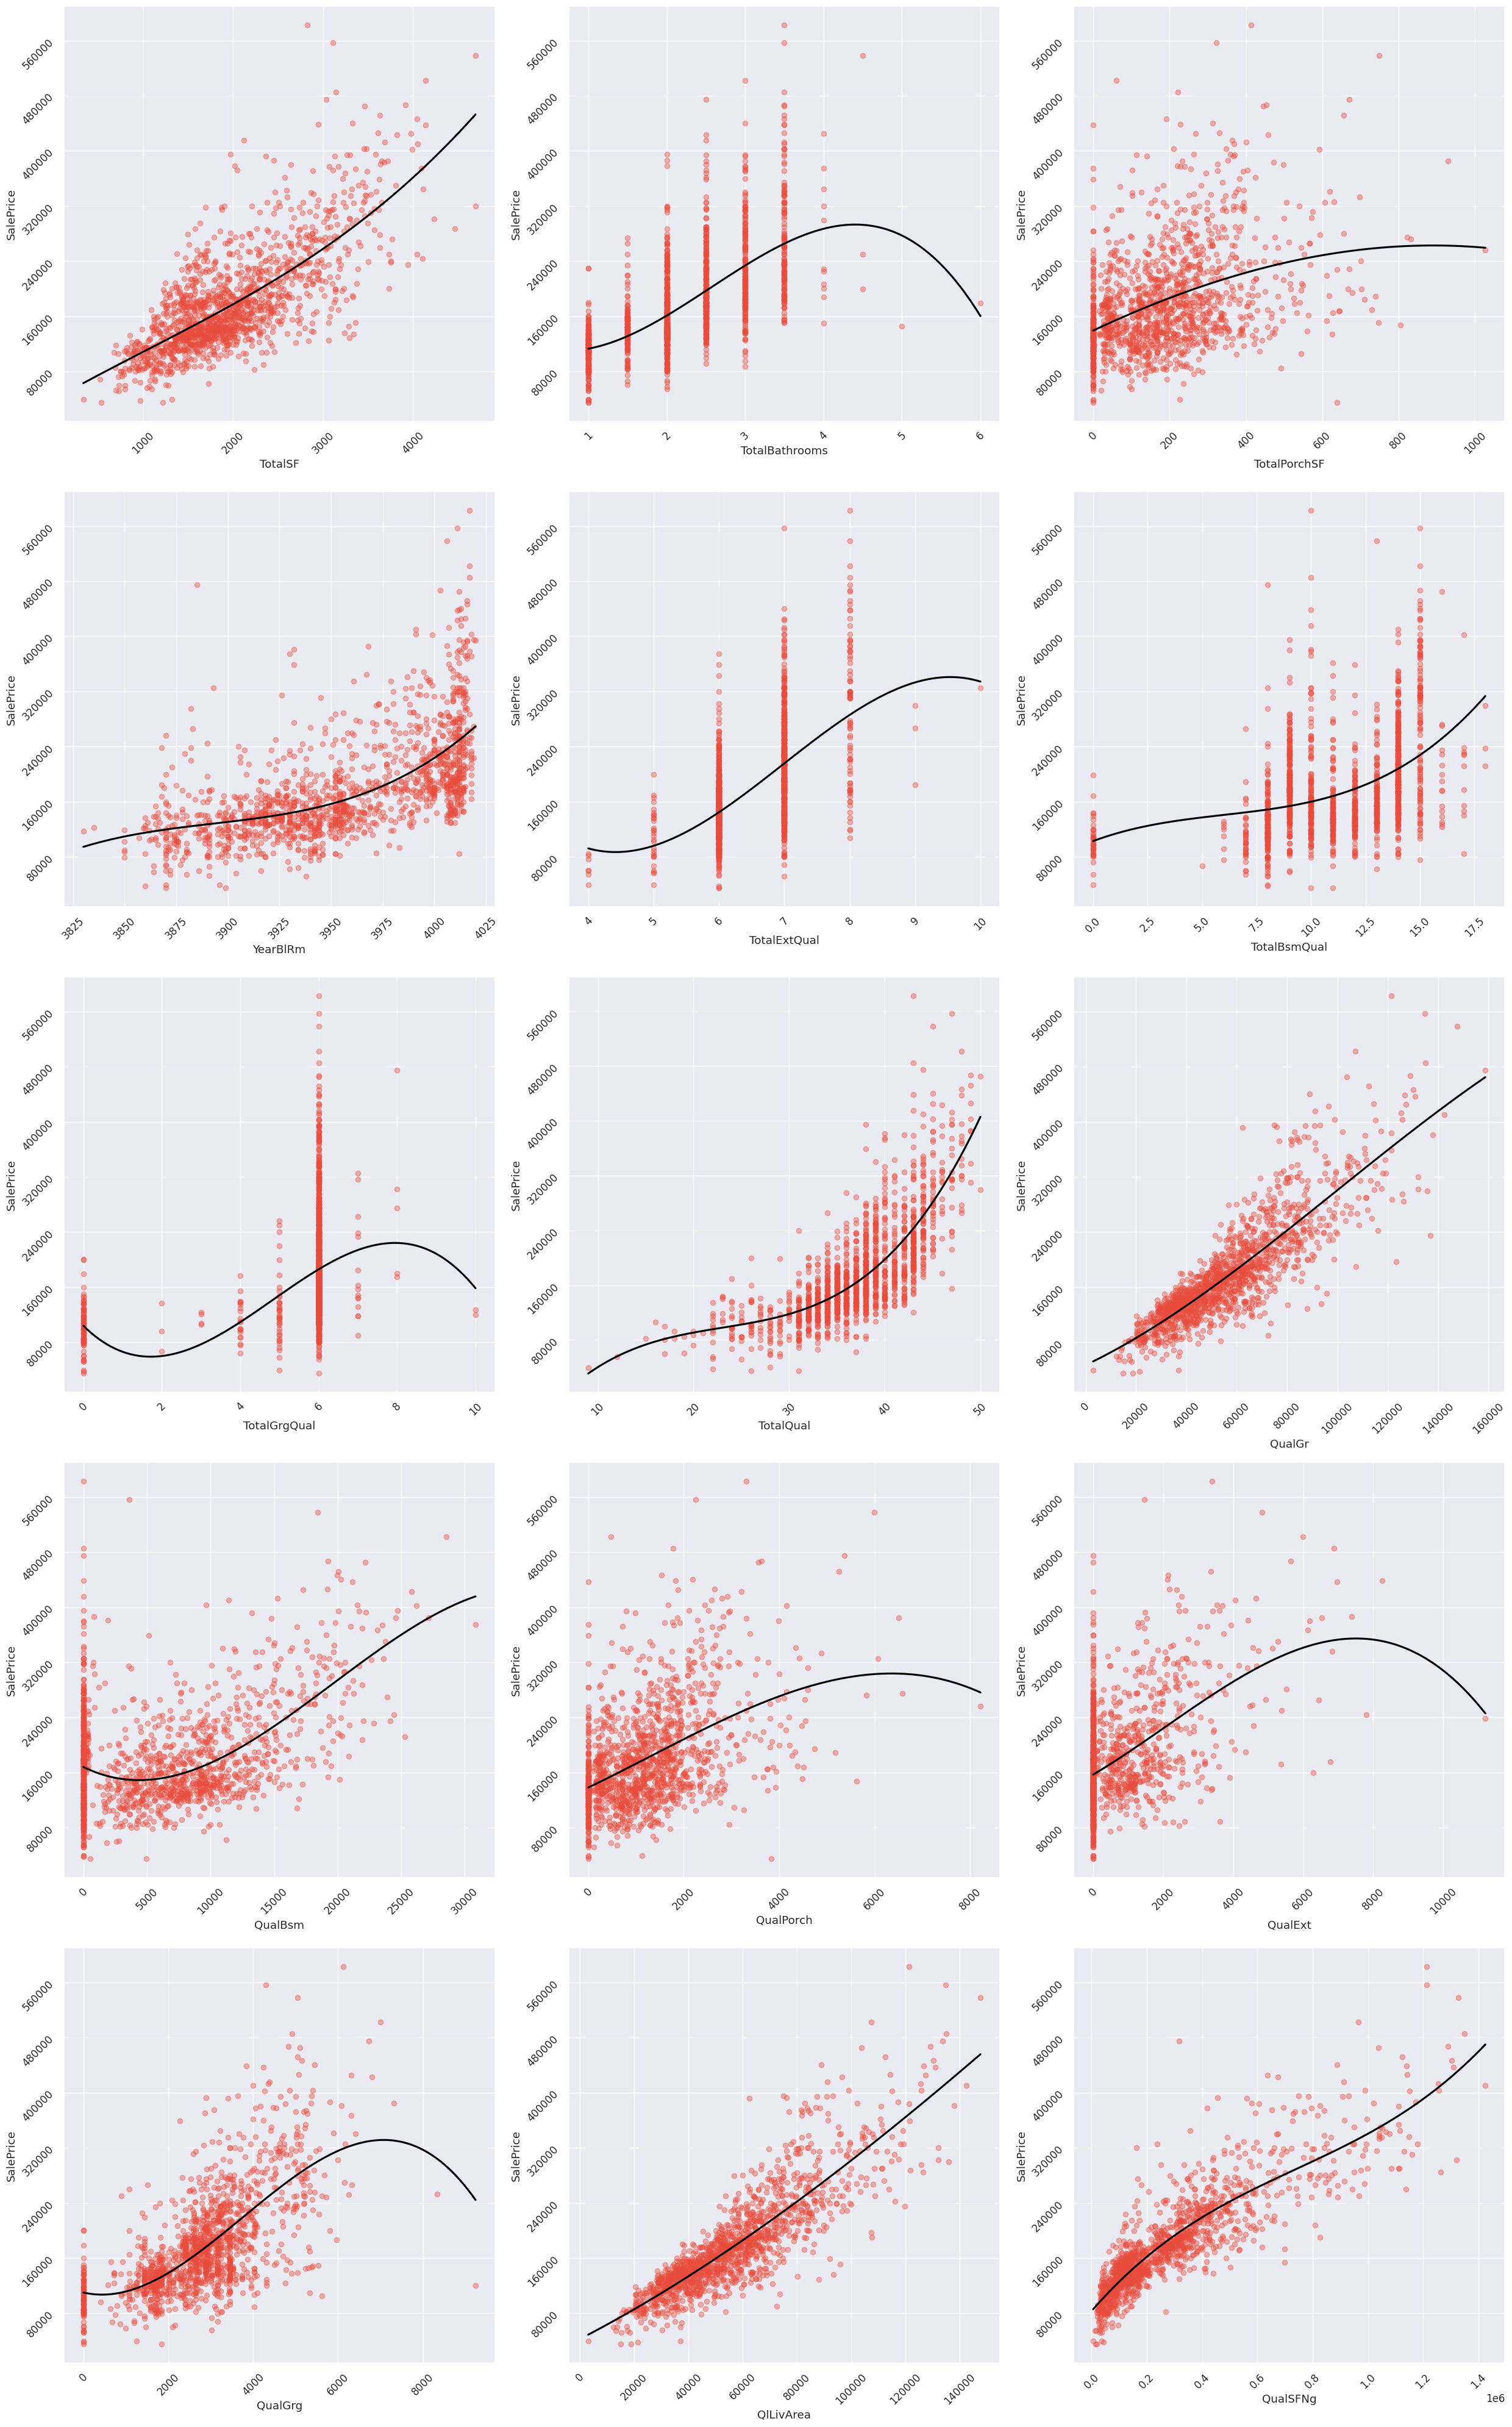

In [29]:
srt_reg('SalePrice')

In [30]:
# Creating some simple features
features['HasPool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['Has2ndFloor'] = features['2ndFlrSF'].apply(lambda x: 1
                                                     if x > 0 else 0)
features['HasGarage'] = features['QualGrg'].apply(lambda x: 1 if x > 0 else 0)
features['HasBsmt'] = features['QualBsm'].apply(lambda x: 1 if x > 0 else 0)
features['HasFireplace'] = features['Fireplaces'].apply(lambda x: 1
                                                        if x > 0 else 0)
features['HasPorch'] = features['QualPorch'].apply(lambda x: 1 if x > 0 else 0)

# **Transforming the Data**

Some of the continious values are not distributed evenly and not fitting on normal distribution, we can fix them by using couple transformation approaches. 

In [31]:
#list skewed features 
skewed =[
    'LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea',
    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'LowQualFinSF', 'MiscVal'
]

In [32]:
# Finding skewness of the numerical features
skew_features = np.abs(features[skewed].apply(lambda x: skew(x)).sort_values(
    ascending=False))

# Filtering skewed features
high_skew = skew_features[skew_features > 0.3]
high_skew

# Taking indexes of high skew
skew_index = high_skew.index

# Applying boxcox transformation to fix skewness
for i in skew_index:
    features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))

In [33]:
high_skew

MiscVal          21.915535
PoolArea         18.679169
LowQualFinSF     12.065521
3SsnPorch        11.354131
BsmtFinSF2        4.149758
EnclosedPorch     4.010734
ScreenPorch       3.949058
MasVnrArea        2.549087
OpenPorchSF       2.531173
WoodDeckSF        1.855872
LotFrontage       1.098181
BsmtFinSF1        0.967187
GrLivArea         0.960750
BsmtUnfSF         0.916594
2ndFlrSF          0.834715
TotalBsmtSF       0.603637
dtype: float64

Here we dropping some unnecessary features had their use in feature engineering or not needed at all.

In [34]:
# Features to drop
to_drop = [
    'Utilities',
    'PoolQC',
    'YrSold',
    'MoSold',
    'ExterQual',
    'BsmtQual',
    'GarageQual',
    'KitchenQual',
    'HeatingQC',
]
# Dropping features
features.drop(columns=to_drop, inplace=True)

one hot encode the categorical data 

In [35]:
# Getting dummy variables for categorical data
features = pd.get_dummies(data=features).astype('int')

# **Double Check**

before move to modeling i want to take one last look to the data we processed. everything seems in order, not missing datas, values are numerical etc. our feature egineered data is present



In [36]:
print(f'Number of missing values : {features.isna().sum().sum()}')
print(f'feature shape : {features.shape}')

Number of missing values : 0
feature shape : (2908, 251)


In [37]:
features.sample(5)

LotFrontage  LotArea  Neighborhood  OverallQual  OverallCond  YearBuilt  \
1000           19    10206             2            3            3       1952   
2242           13     2665             1            5            7       1976   
424            19     9000             3            6            5       1956   
1007            8     2217             1            4            4       1970   
1710           21    10603             7            8            5       2006   

      YearRemodAdd  MasVnrArea  ExterCond  BsmtCond  BsmtFinType1  BsmtFinSF1  \
1000          1952           0          3         0             0           0   
2242          1976           0          3         3             5          82   
424           1956          12          3         3             2         133   
1007          1970           0          3         3             4          74   
1710          2006          15          3         4             6         143   

      BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
1000             0           0          0            0       944         0   
2242             1           0         39          310       925       738   
424              1           0         67          622      1196         0   
1007             2           9          0          308       546       733   
1710             1           0         37          482       909      1221   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
1000             0          8             0             0         1         0   
2242             0          9             0             0         2         0   
424              0          8             1             0         1         0   
1007             0          8             0             0         1         1   
1710             0          9             1             0         2         1   

      BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  FireplaceQu  \
1000             2             1             4           0            0   
2242             4             1             6           1            3   
424              2             1             6           1            4   
1007             3             1             6           0            0   
1710             3             1             8           1            4   

      GarageYrBlt  GarageCars  GarageArea  GarageCond  WoodDeckSF  \
1000         1956           2         528           2           0   
2242         1976           1         336           3          25   
424          1956           1         297           3           0   
1007         1970           1         286           3          48   
1710         2006           3         782           3          38   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
1000            0              0          0            0         0        0   
2242            7              0          0            0         0        0   
424            10              0          0            0         0        0   
1007            0              0          0            0         0        0   
1710           10              0          0            0         0        0   

      TotalSF  TotalBathrooms  TotalPorchSF  YearBlRm  TotalExtQual  \
1000      944               1             0      3904             6   
2242     1793               2           118      3952             6   
424      1812               2            44      3912             6   
1007     1638               1           238      3940             6   
1710     2477               3           213      4012             7   

      TotalBsmQual  TotalGrgQual  TotalQual  QualGr  QualBsm  QualPorch  \
1000             0             5         18   16992        0          0   
2242            13             6         36   53100     4134        708   
424             10             6         35   41860     6160        264   
1007    

In [38]:
features.describe()

LotFrontage        LotArea  Neighborhood  OverallQual  OverallCond  \
count  2908.000000    2908.000000   2908.000000  2908.000000  2908.000000   
mean     18.405089   10095.974553      4.455640     6.081843     5.566713   
std       3.711880    7746.609000      2.457431     1.397639     1.114074   
min       8.000000    1300.000000      1.000000     1.000000     1.000000   
25%      17.000000    7449.750000      3.000000     5.000000     5.000000   
50%      19.000000    9432.000000      4.000000     6.000000     5.000000   
75%      20.000000   11503.000000      5.000000     7.000000     6.000000   
max      48.000000  215245.000000     10.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea    ExterCond     BsmtCond  \
count  2908.000000   2908.000000  2908.000000  2908.000000  2908.000000   
mean   1971.252751   1984.227992     7.989684     3.085282     2.918157   
std      30.296319     20.899483    10.958465     0.372262     0.576014   
min    1872.000000   1950.000000     0.000000     1.000000     0.000000   
25%    1953.000000   1965.000000     0.000000     3.000000     3.000000   
50%    1973.000000   1993.000000     0.000000     3.000000     3.000000   
75%    2001.000000   2004.000000    18.000000     3.000000     3.000000   
max    2010.000000   2010.000000    51.000000     5.000000     4.000000   

       BsmtFinType1   BsmtFinSF1  BsmtFinType2   BsmtFinSF2    BsmtUnfSF  \
count   2908.000000  2908.000000   2908.000000  2908.000000  2908.000000   
mean       3.535420    89.063961      1.273384     1.102820    59.862792   
std        2.113347    78.956703      0.954352     3.093556    32.774670   
min        0.000000     0.000000      0.000000     0.000000     0.000000   
25%        1.000000     0.000000      1.000000     0.000000    37.000000   
50%        4.000000    92.000000      1.000000     0.000000    59.000000   
75%        6.000000   150.000000      1.000000     0.000000    82.000000   
max        6.000000   507.000000      6.000000    14.000000   154.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  2908.000000  2908.000000  2908.000000   2908.000000  2908.000000   
mean    546.362792  1154.790234   459.948762      0.053645     8.701513   
std     201.606604   380.684495   589.968457      0.457943     0.590288   
min       0.000000   334.000000     0.000000      0.000000     7.000000   
25%     430.000000   876.000000     0.000000      0.000000     8.000000   
50%     524.000000  1081.000000     0.000000      0.000000     9.000000   
75%     669.000000  1382.250000   958.000000      0.000000     9.000000   
max    2267.000000  5095.000000  2673.000000      5.000000    11.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   2908.000000   2908.000000  2908.000000  2908.000000   2908.000000   
mean       0.427785      0.061210     1.565681     0.379642      2.859697   
std        0.523883      0.245429     0.550340     0.502787      0.822532   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     4.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces  FireplaceQu  GarageYrBlt  \
count   2908.000000   2908.000000  2908.000000  2908.000000  2908.000000   
mean       1.044704      6.440509     0.593535     1.761692  1869.897180   
std        0.214850      1.557377     0.642910     1.805455   450.471016   
min        0.000000      2.000000     0.000000     0.000000     0.000000   
25%        1.000000      5.000000     0.000000     0.000000  1957.000000   
50%        1.000000      6.000000     1.000000     1.000000  1977.000000   
75%        1.000000      7.000000     1.000000    

In [39]:
#separating train and test set
train = features.iloc[:len(y), :]
test = features.iloc[len(train):, :]

In [40]:
#check train and test shape
print(f'Train shape : {train.shape}')
print(f'Test shape : {test.shape}')

Train shape : (1449, 251)
Test shape : (1459, 251)


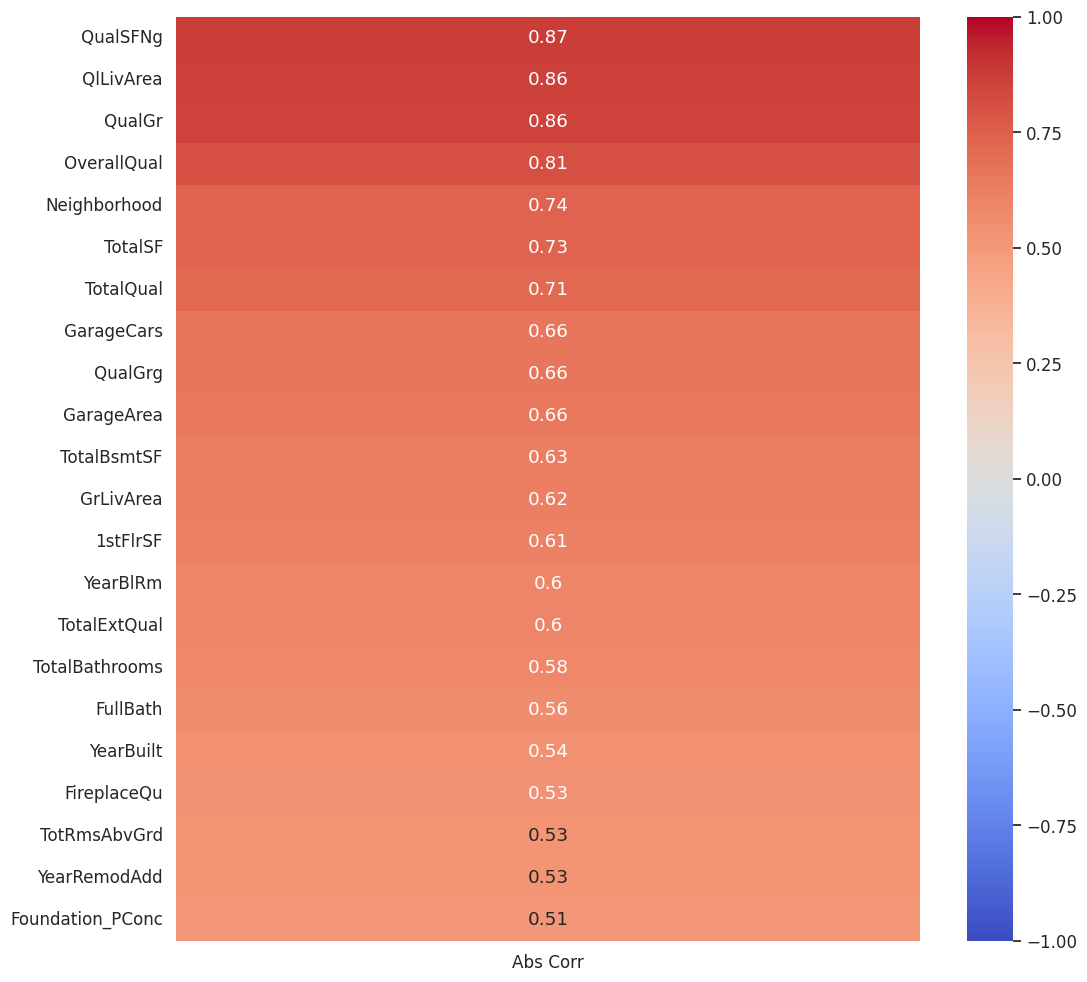

In [41]:
#merged=train.join(y)
correlations = train.join(y).corrwith(train.join(y)['SalePrice']).iloc[:-1].to_frame()
correlations['Abs Corr'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('Abs Corr', ascending=False)['Abs Corr']
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(sorted_correlations.to_frame()[sorted_correlations>=.5], cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

In [42]:
def plot_dist3(df, feature, title):
    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))
    # creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 fit=norm,
                 ax=ax1,
                 color='#e74c3c')
    ax1.legend(labels=['Normal', 'Actual'])

    # customizing the QQ_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Probability Plot')
    # Plotting the QQ_Plot.
    stats.probplot(df.loc[:, feature].fillna(np.mean(df.loc[:, feature])),
                   plot=ax2)
    ax2.get_lines()[0].set_markerfacecolor('#e74c3c')
    ax2.get_lines()[0].set_markersize(12.0)

    # Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title.
    ax3.set_title('Box Plot')
    # Plotting the box plot.
    sns.boxplot(df.loc[:, feature], orient='v', ax=ax3, color='#e74c3c')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=24))

    plt.suptitle(f'{title}', fontsize=24)

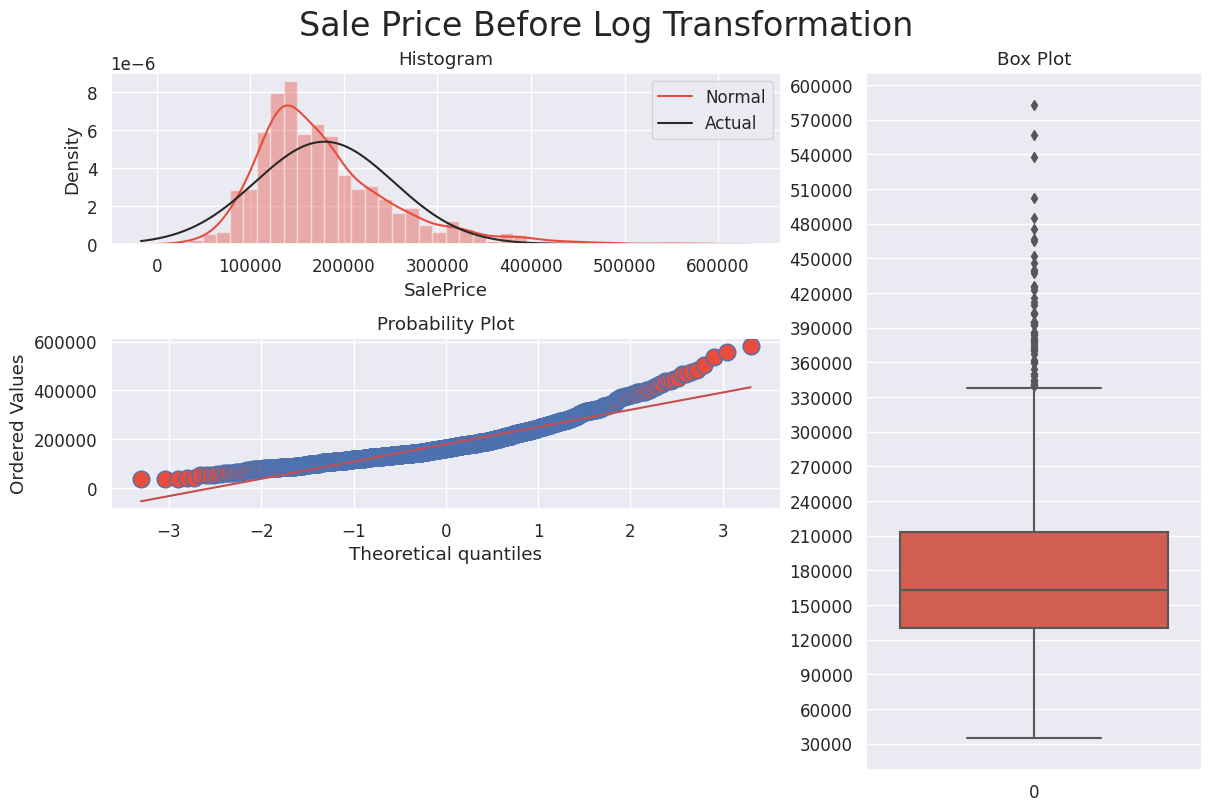

In [43]:
# Checking target variable
plot_dist3(train.join(y), 'SalePrice', 'Sale Price Before Log Transformation')

In [44]:
# Setting model data
X = train
X_test = test
y = np.log1p(y)

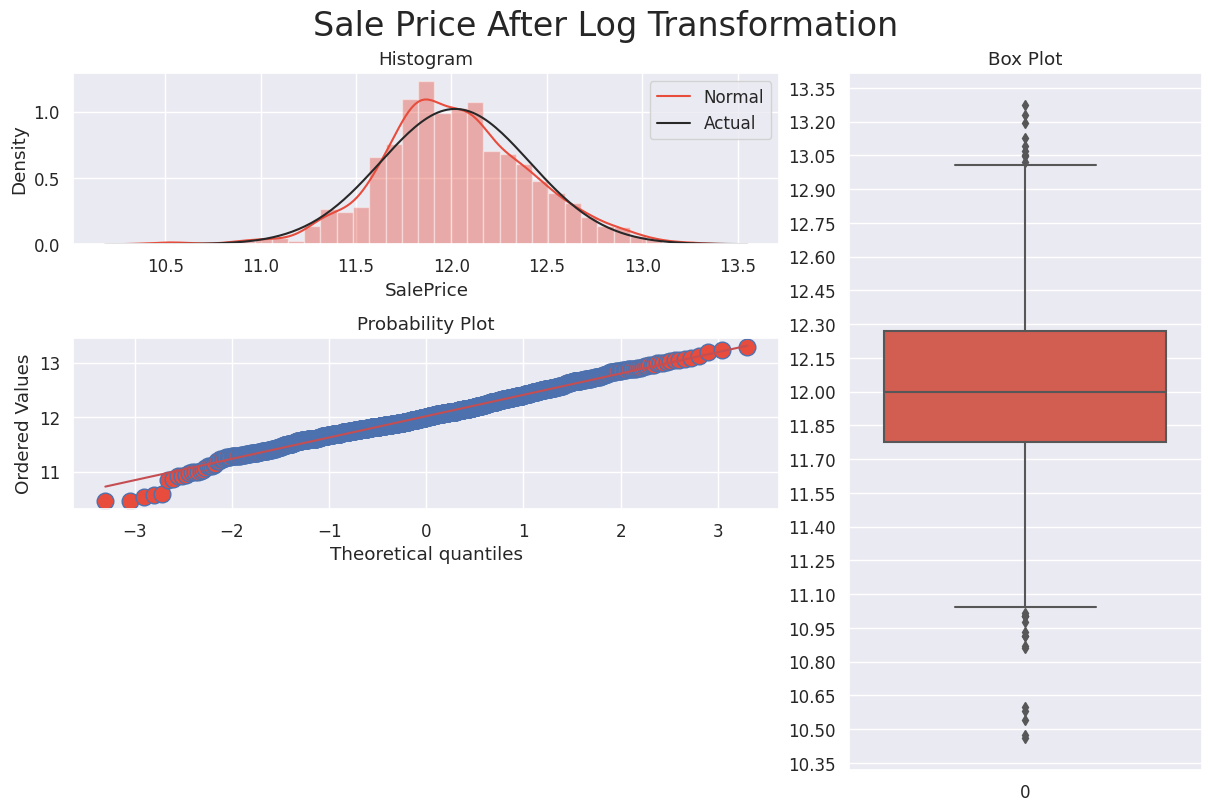

In [45]:
plot_dist3(train.join(y), 'SalePrice', 'Sale Price After Log Transformation')

# **Modeling**

the regressors i'm going to use here are:
* Ridge
* Lasso
* Elasticnet
* Support Vector Regression
  
i will apply robust scaler on these before we run them because they really get effected by outliers
* Gradient Boosting Regressor
* LightGBM regressor
* XGBoost Regressor

These dont need scaling in my opinion so we just go as it is
* Hist gradient Boosting Regressor
  

In [46]:
# Loading neccesary packages for modelling

from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor

In [47]:
# Setting kfold for future use
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [48]:
alphas_alt = [15.5, 15.6, 15.7, 15.8, 15.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [
    5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008
]
e_alphas = [
    0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007
]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

# ridge_cv
ridge = make_pipeline(RobustScaler(), RidgeCV(
    alphas=alphas_alt,
    cv=kf,
))

# lasso_cv
lasso = make_pipeline(
    RobustScaler(),
    LassoCV(max_iter=int(1e7), alphas=alphas2, random_state=42, cv=kf))

# elasticnet_cv
elasticnet = make_pipeline(
    RobustScaler(),
    ElasticNetCV(max_iter=int(1e7),
                 alphas=e_alphas,
                 cv=kf,
                random_state=42,
                 l1_ratio=e_l1ratio))

# svr
svr = make_pipeline(RobustScaler(),
                    SVR(C=21, epsilon=0.0099, gamma=0.00017, tol=0.000121))

# gradientboosting
gbr = GradientBoostingRegressor(n_estimators=2900,
                                learning_rate=0.0161,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=17,
                                loss='huber',
                                random_state=42)

# lightgbm
lightgbm = LGBMRegressor(objective='regression',
                         n_estimators=2000,
                         num_leaves=31,            # more capacity
                         learning_rate=0.05,       # reasonable speed
                         max_bin=255,
                         bagging_fraction=0.8,
                         feature_fraction=0.8,
                         bagging_freq=5,
                         min_data_in_leaf=20,
                         random_state=42)

# xgboost
xgboost = XGBRegressor(
    learning_rate=0.0139,
    n_estimators=4500,
    max_depth=4,
    min_child_weight=0,
    subsample=0.7968,
    colsample_bytree=0.4064,
    nthread=-1,
    scale_pos_weight=2,
    seed=42,
)

hgrd= HistGradientBoostingRegressor(loss= 'squared_error',
    max_depth= 2,
    min_samples_leaf= 40,
    max_leaf_nodes= 29,
    learning_rate= 0.15,
    max_iter= 225,
    random_state=42)


# stack
stack_gen = StackingCVRegressor(regressors=(ridge,lasso,elasticnet, gbr,
                                            xgboost,hgrd),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

# **CROSS VALIDATION**

In [49]:
#kfoldValidation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
oof = np.zeros(len(X))
preds = np.zeros(len(X_test))

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    model = LGBMRegressor(n_estimators=1000, learning_rate=0.01, random_state=42)
    
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
    )
    
    oof[val_idx] = model.predict(X_val)
    preds += model.predict(X_test) / kf.n_splits
# 🧮 CV RMSE
rmse = mean_squared_error(y, oof, squared=False)
print(f"✅ CV RMSE: {rmse:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4638
[LightGBM] [Info] Number of data points in the train set: 1159, number of used features: 164
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 12.023514
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4624
[LightGBM] [Info] Number of data points in the train set: 1159, number of used features: 162


In [50]:
def model_check(X, y, estimators, cv):
    model_table = pd.DataFrame()

    row_index = 0
    for est, label in zip(estimators, labels):

        MLA_name = label
        model_table.loc[row_index, 'Model Name'] = MLA_name

        cv_results = cross_validate(est,
                                    X,
                                    y,
                                    cv=cv,
                                    scoring='neg_root_mean_squared_error',
                                    return_train_score=True,
                                    n_jobs=-1)

        model_table.loc[row_index, 'Train RMSE'] = -cv_results[
            'train_score'].mean()
        model_table.loc[row_index, 'Test RMSE'] = -cv_results[
            'test_score'].mean()
        model_table.loc[row_index, 'Test Std'] = cv_results['test_score'].std()
        model_table.loc[row_index, 'Time'] = cv_results['fit_time'].mean()

        row_index += 1

    model_table.sort_values(by=['Test RMSE'],
                            ascending=True,
                            inplace=True)

    return model_table

In [51]:
# Setting list of estimators and labels for them
estimators = [ridge, lasso, elasticnet, gbr, lightgbm, xgboost, svr, hgrd, ]
labels = [
    'Ridge', 'Lasso', 'Elasticnet', 'GradientBoostingRegressor', 'LightgbmRegressor',
    'XGBRegressor', 'SVR', 'HistGradientBoostingRegressor']

# **Model Results**
 Looks like our models did pretty close to each other, there might be some overfitting models and we can try to fix them by tuning but it was computationally expensive for me and since I'm going to stack and blend the models I think we can leave them as it is. We already added our models to stacking regression and set the XGBoost as meta regressor we can continue with stacking

In [53]:
# Executing cross validation (executed with cpu for 43 minutes)
raw_models = model_check(X, y, estimators, kf)
display(raw_models.style.background_gradient(cmap='summer_r'))

# **stacking and blending**

In [56]:
# Fitting the models on train data
print('=' * 20, 'START Fitting', '=' * 20)
print('=' * 55)

print(datetime.now(), 'StackingCVRegressor')
stack_gen_model = stack_gen.fit(X.values, y.values)
print(datetime.now(), 'Elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)
print(datetime.now(), 'Lasso')
lasso_model_full_data = lasso.fit(X, y)
print(datetime.now(), 'Ridge')
ridge_model_full_data = ridge.fit(X, y)
print(datetime.now(), 'SVR')
svr_model_full_data = svr.fit(X, y)
print(datetime.now(), 'GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)
print(datetime.now(), 'LightGBM')
lgbm_model_full_data = lightgbm.fit(X,y)
print(datetime.now(), 'XGboost')
xgb_model_full_data = xgboost.fit(X, y)
print(datetime.now(), 'Hist')
hist_full_data = hgrd.fit(X, y)
print('=' * 20, 'FINISHED Fitting', '=' * 20)
print('=' * 58)

==================== START Fitting ====================
2025-08-11 04:37:07.237143 StackingCVRegressor
2025-08-11 04:40:59.615576 Elasticnet
2025-08-11 04:41:06.743387 Lasso
2025-08-11 04:41:09.253233 Ridge
2025-08-11 04:41:11.051915 SVR
2025-08-11 04:41:11.520755 GradientBoosting
2025-08-11 04:41:28.981446 LightGBM
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM

In [57]:
# Blending models by assigning weights
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) +
            (0.1 * lasso_model_full_data.predict(X)) +
            (0.1 * ridge_model_full_data.predict(X)) +
            (0.1 * svr_model_full_data.predict(X)) +
            (0.1 * gbr_model_full_data.predict(X)) +
            (0.1 * xgb_model_full_data.predict(X)) +
            (0.1 * lgbm_model_full_data.predict(X))+
            (0.05 * hist_full_data.predict(X)) +
            (0.25 * stack_gen_model.predict(X.values)))

In [58]:
submission = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')
# Inversing and flooring log scaled sale price predictions
submission['SalePrice'] = np.floor(np.expm1(blend_models_predict(X_test)))
# Defining outlier quartile ranges
q1 = submission['SalePrice'].quantile(0.0050)
q2 = submission['SalePrice'].quantile(0.99)

# Applying weights to outlier ranges to smooth them
submission['SalePrice'] = submission['SalePrice'].apply(
    lambda x: x if x > q1 else x * 0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x
                                                        if x < q2 else x * 1.1)
submission = submission[['Id', 'SalePrice']]
submission

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


Id  SalePrice
0     1461   118795.0
1     1462   159060.0
2     1463   188185.0
3     1464   198303.0
4     1465   186376.0
...    ...        ...
1454  2915    85266.0
1455  2916    80570.0
1456  2917   166096.0
1457  2918   111921.0
1458  2919   210447.0

[1459 rows x 2 columns]

In [59]:
submission.to_csv('submission_blending-m.csv', index = False) 